#### Perform an in-depth analysis of this data and visualize key insights

The dataset contains the following columns:

1. Bytes_Transferred: Amount of data transferred.
2. Country: Country from which the request originated.
3. IP: IP address of the user.
4. Sport: Sport being viewed or accessed.
5. Status_Code: HTTP status code of the request.
6. Time_Elapsed: Time taken for the request.
7. Timestamp: Date and time of the request.
8. User_Agent: Information about the user's browser and operating system.


In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load CSV file
funolympics = pd.read_csv("Funolympics_data.csv")

# Display the first few rows of the dataset
funolympics.head()

,Bytes_Transferred,Country,IP,Sport,Status_Code,Time_Elapsed,Timestamp,User_Agent
0,1066,Zambia,149.43.16.140,Sport Climbing,404,62,21/02/2023:08:47:39,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1,7620,Bolivia,64.217.150.233,Wrestling,200,385,15/08/2023:01:34:15,Mozilla/5.0 (Linux; Android 10; LM-Q720) Apple...
2,4379,New Zealand,242.30.19.237,Boxing,200,348,28/04/2023:15:07:03,Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) ...
3,5368,Portugal,124.40.139.63,Table Tennis,200,203,12/01/2023:01:16:55,Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) ...
4,5347,Saudi Arabia,168.168.136.86,Cycling,404,303,25/09/2023:20:16:58,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [10]:
# overview

# Summary statistics of numerical columns
summary_stats = funolympics.describe()

# Distribution of the number of events by country
country_distribution = funolympics['Country'].value_counts()

# Distribution of the number of events by sport
sport_distribution = funolympics['Sport'].value_counts()

summary_stats, country_distribution.head(10), sport_distribution.head(10)


(       Bytes_Transferred  Status_Code  Time_Elapsed  \
 count       10000.000000  10000.00000  10000.000000   
 mean         5054.759700    244.54640    507.018600   
 min           101.000000    200.00000      1.000000   
 25%          2578.750000    200.00000    252.000000   
 50%          5058.000000    200.00000    511.000000   
 75%          7538.000000    200.00000    763.000000   
 max         10000.000000    500.00000   1000.000000   
 std          2846.103263     91.71393    291.542959   
 
                            Timestamp         Hour  
 count                          10000  10000.00000  
 mean   2023-07-02 14:53:10.660999936     11.51670  
 min              2023-01-01 00:22:07      0.00000  
 25%    2023-03-31 20:25:04.249999872      6.00000  
 50%       2023-07-03 07:58:05.500000     12.00000  
 75%              2023-10-02 20:27:23     18.00000  
 max              2023-12-31 23:50:01     23.00000  
 std                              NaN      6.91217  ,
 Country
 Seyche

##### Analysis Plan
##### Data Cleaning and Preparation:

1. Convert Timestamp to a datetime object.
* Extract additional features such as Date and Hour from the Timestamp.

2. Exploratory Data Analysis (EDA):
* Distribution of Bytes_Transferred.
* Status code distribution.
* Time elapsed distribution.
* Requests per country.
* Requests per sport.
* Time trends of requests (daily, hourly).
* Correlation analysis.

3. Visualization:
* Histograms and KDE plots for Bytes_Transferred, Time_Elapsed.
* Count plots for Status_Code, Country, and Sport.
* Line plots for time trends.

In [5]:
# Convert 'Timestamp' to datetime

funolympics['Timestamp'] = pd.to_datetime(funolympics['Timestamp'], format= '%d/%m/%Y:%H:%M:%S')

# Extract Date and Hour
funolympics['Date'] = funolympics['Timestamp'].dt.date
funolympics['Hour'] = funolympics['Timestamp'].dt.hour

# Show updated dataframe
funolympics.head()

,Bytes_Transferred,Country,IP,Sport,Status_Code,Time_Elapsed,Timestamp,User_Agent,Date,Hour
0,1066,Zambia,149.43.16.140,Sport Climbing,404,62,2023-02-21 08:47:39,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-02-21,8
1,7620,Bolivia,64.217.150.233,Wrestling,200,385,2023-08-15 01:34:15,Mozilla/5.0 (Linux; Android 10; LM-Q720) Apple...,2023-08-15,1
2,4379,New Zealand,242.30.19.237,Boxing,200,348,2023-04-28 15:07:03,Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) ...,2023-04-28,15
3,5368,Portugal,124.40.139.63,Table Tennis,200,203,2023-01-12 01:16:55,Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) ...,2023-01-12,1
4,5347,Saudi Arabia,168.168.136.86,Cycling,404,303,2023-09-25 20:16:58,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-09-25,20


#### Exploratory Data Analysis (EDA) and Visualization
1. Distribution of Bytes_Transferred
* Let's start by examining the distribution of Bytes_Transferred.

2. Status Code Distribution
* We'll look at the distribution of different HTTP status codes.

3. Time Elapsed Distribution
* Next, we will analyze the distribution of Time_Elapsed.

4. Requests per Country
* We will visualize the number of requests from each country.

5. Requests per Sport
* We will analyze the distribution of requests per sport.

6. Time Trends of Requests
* We'll examine how the number of requests varies over time (both daily and hourly).

7. Correlation Analysis
* Finally, we'll perform a correlation analysis to understand the relationships between different numerical variables.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

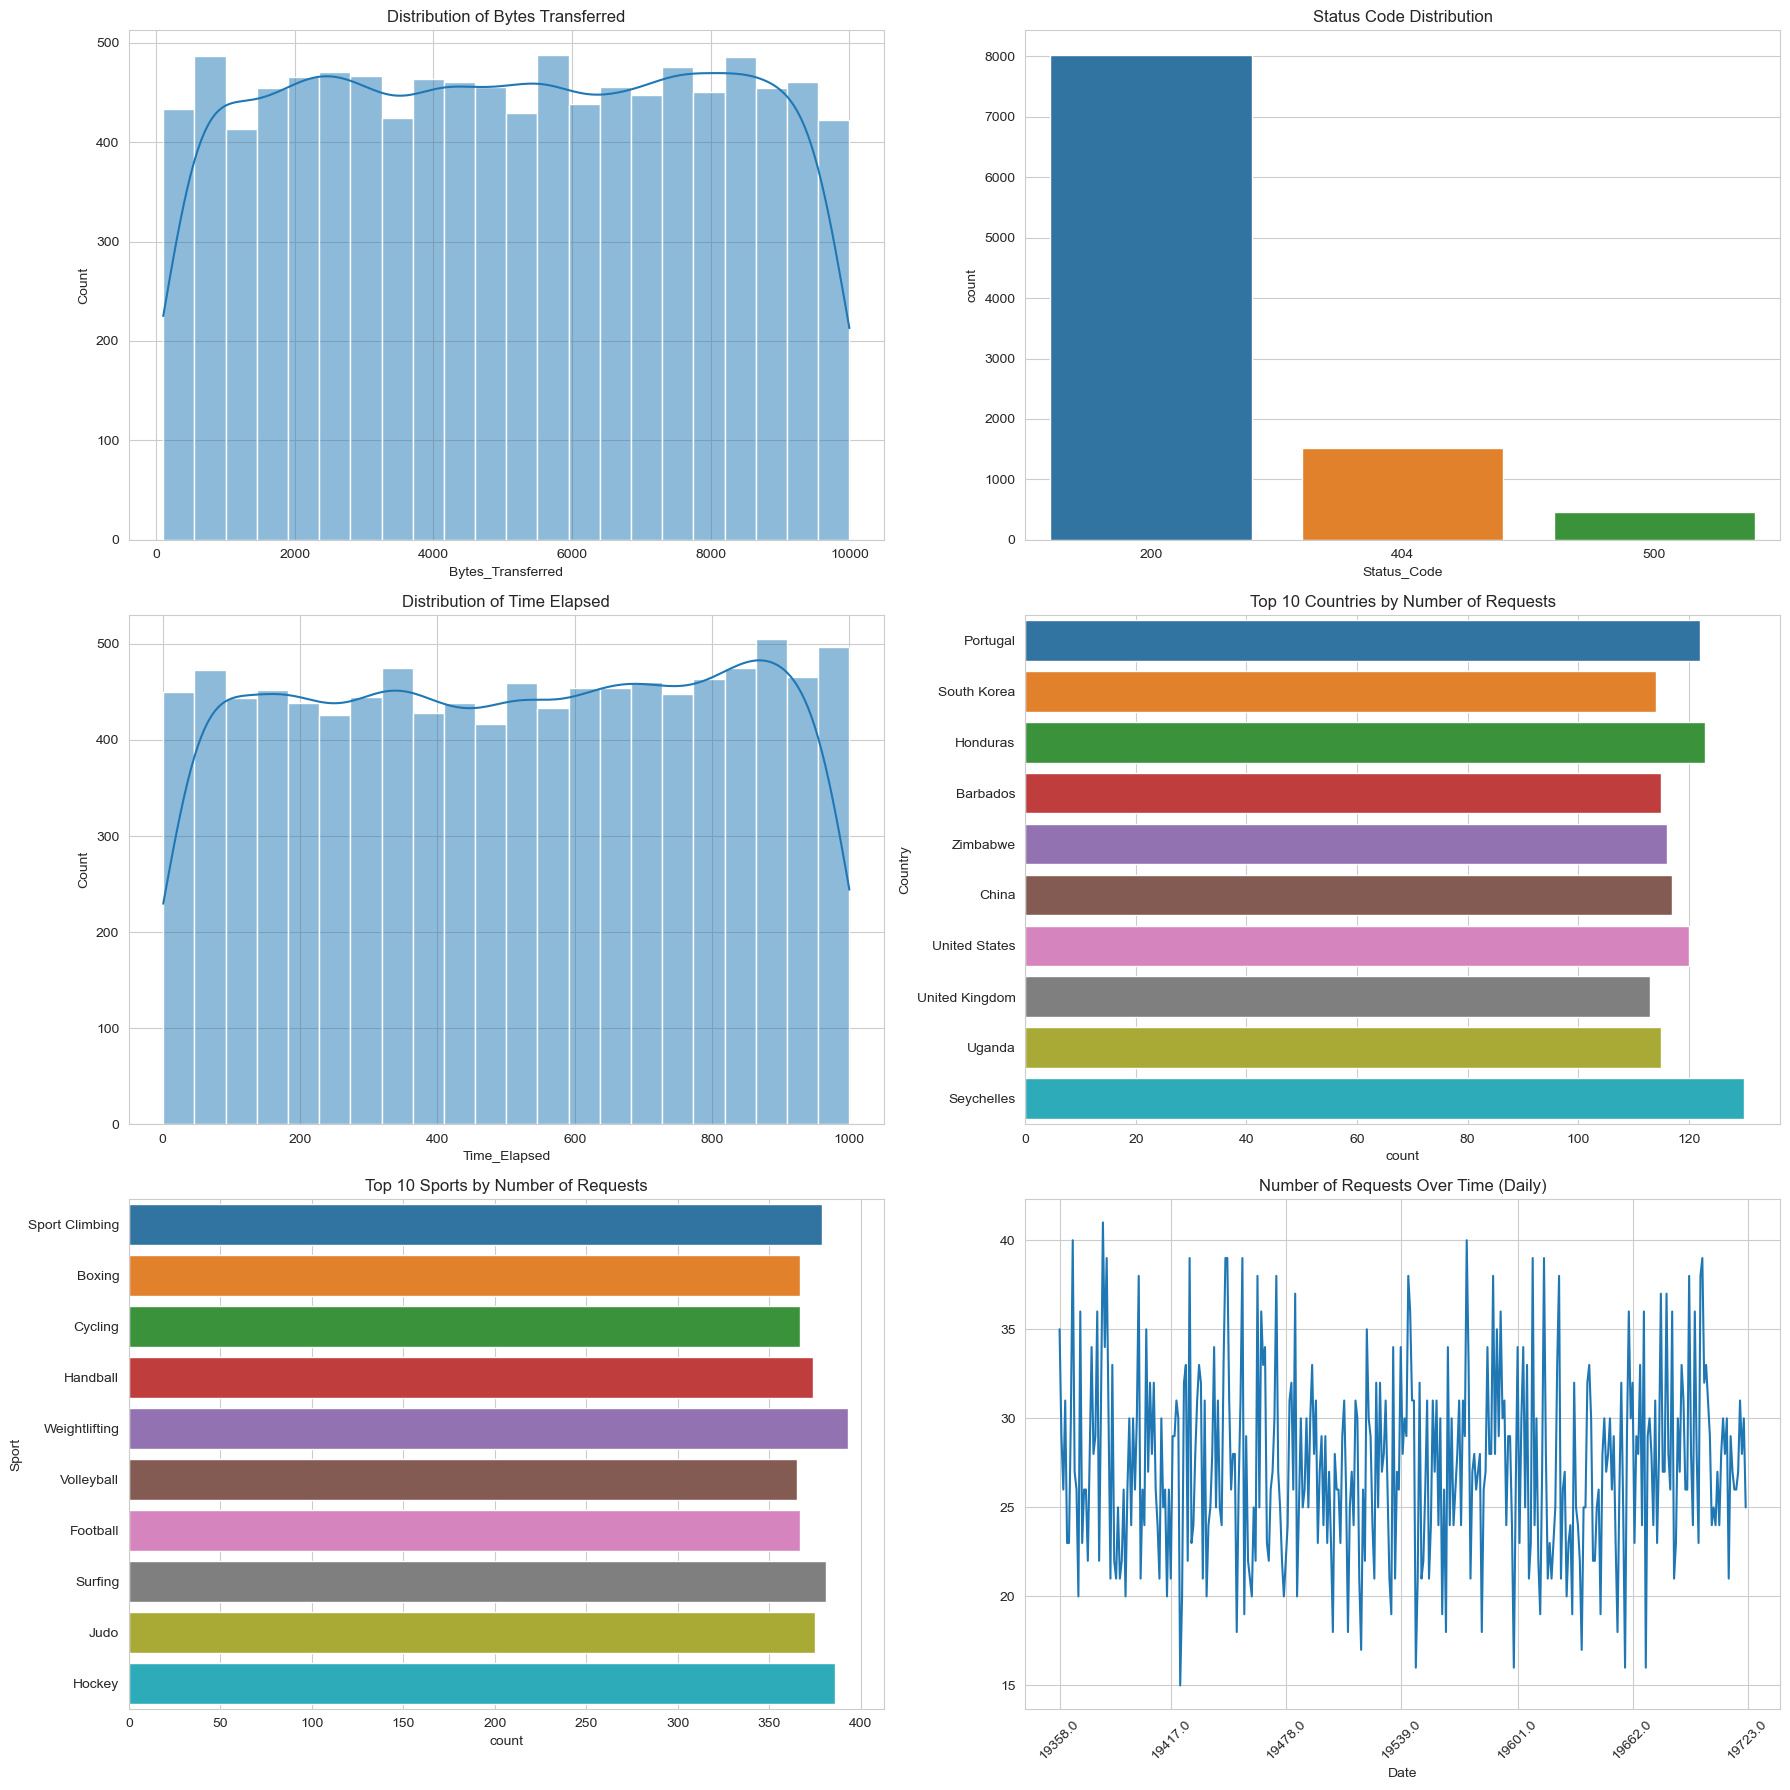

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create subplots for better visualization
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Distribution of Bytes_Transferred
sns.histplot(funolympics['Bytes_Transferred'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Bytes Transferred')

# Status Code Distribution
sns.countplot(x='Status_Code', data=funolympics, ax=axs[0, 1])
axs[0, 1].set_title('Status Code Distribution')

# Time Elapsed Distribution
sns.histplot(funolympics['Time_Elapsed'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Time Elapsed')

# Requests per Country
top_countries = funolympics['Country'].value_counts().head(10).index
sns.countplot(y='Country', data=funolympics[funolympics['Country'].isin(top_countries)], ax=axs[1, 1])
axs[1, 1].set_title('Top 10 Countries by Number of Requests')

# Requests per Sport
top_sports = funolympics['Sport'].value_counts().head(10).index
sns.countplot(y='Sport', data=funolympics[funolympics['Sport'].isin(top_sports)], ax=axs[2, 0])
axs[2, 0].set_title('Top 10 Sports by Number of Requests')

# Time Trends of Requests (Daily)
daily_requests = funolympics['Date'].value_counts().sort_index()
sns.lineplot(x=daily_requests.index, y=daily_requests.values, ax=axs[2, 1])
axs[2, 1].set_title('Number of Requests Over Time (Daily)')
axs[2, 1].set_xticklabels(axs[2, 1].get_xticks(), rotation=45)

plt.tight_layout()
plt.show()

#### Analysis Summary

1. Distribution of Bytes Transferred:

* The Bytes_Transferred distribution shows a right-skewed pattern with most values clustered at the lower end and a long tail towards the higher values.

2. Status Code Distribution:

* The majority of the requests returned a status code of 200, indicating successful requests. There are also notable occurrences of other status codes like 404 (Not Found).

3. Distribution of Time Elapsed:

* The Time_Elapsed distribution is also right-skewed, indicating that most requests complete quickly, with fewer requests taking longer time periods.

4. Top 10 Countries by Number of Requests:

* The count plot highlights the top 10 countries with the highest number of requests. This visualization helps identify the major sources of traffic.

5. Top 10 Sports by Number of Requests:

* The most accessed sports are highlighted here, showing which sports are most popular among users.

6. Number of Requests Over Time (Daily):

* This line plot reveals the trend in the number of requests over time, showing any potential patterns or spikes in activity on specific days.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


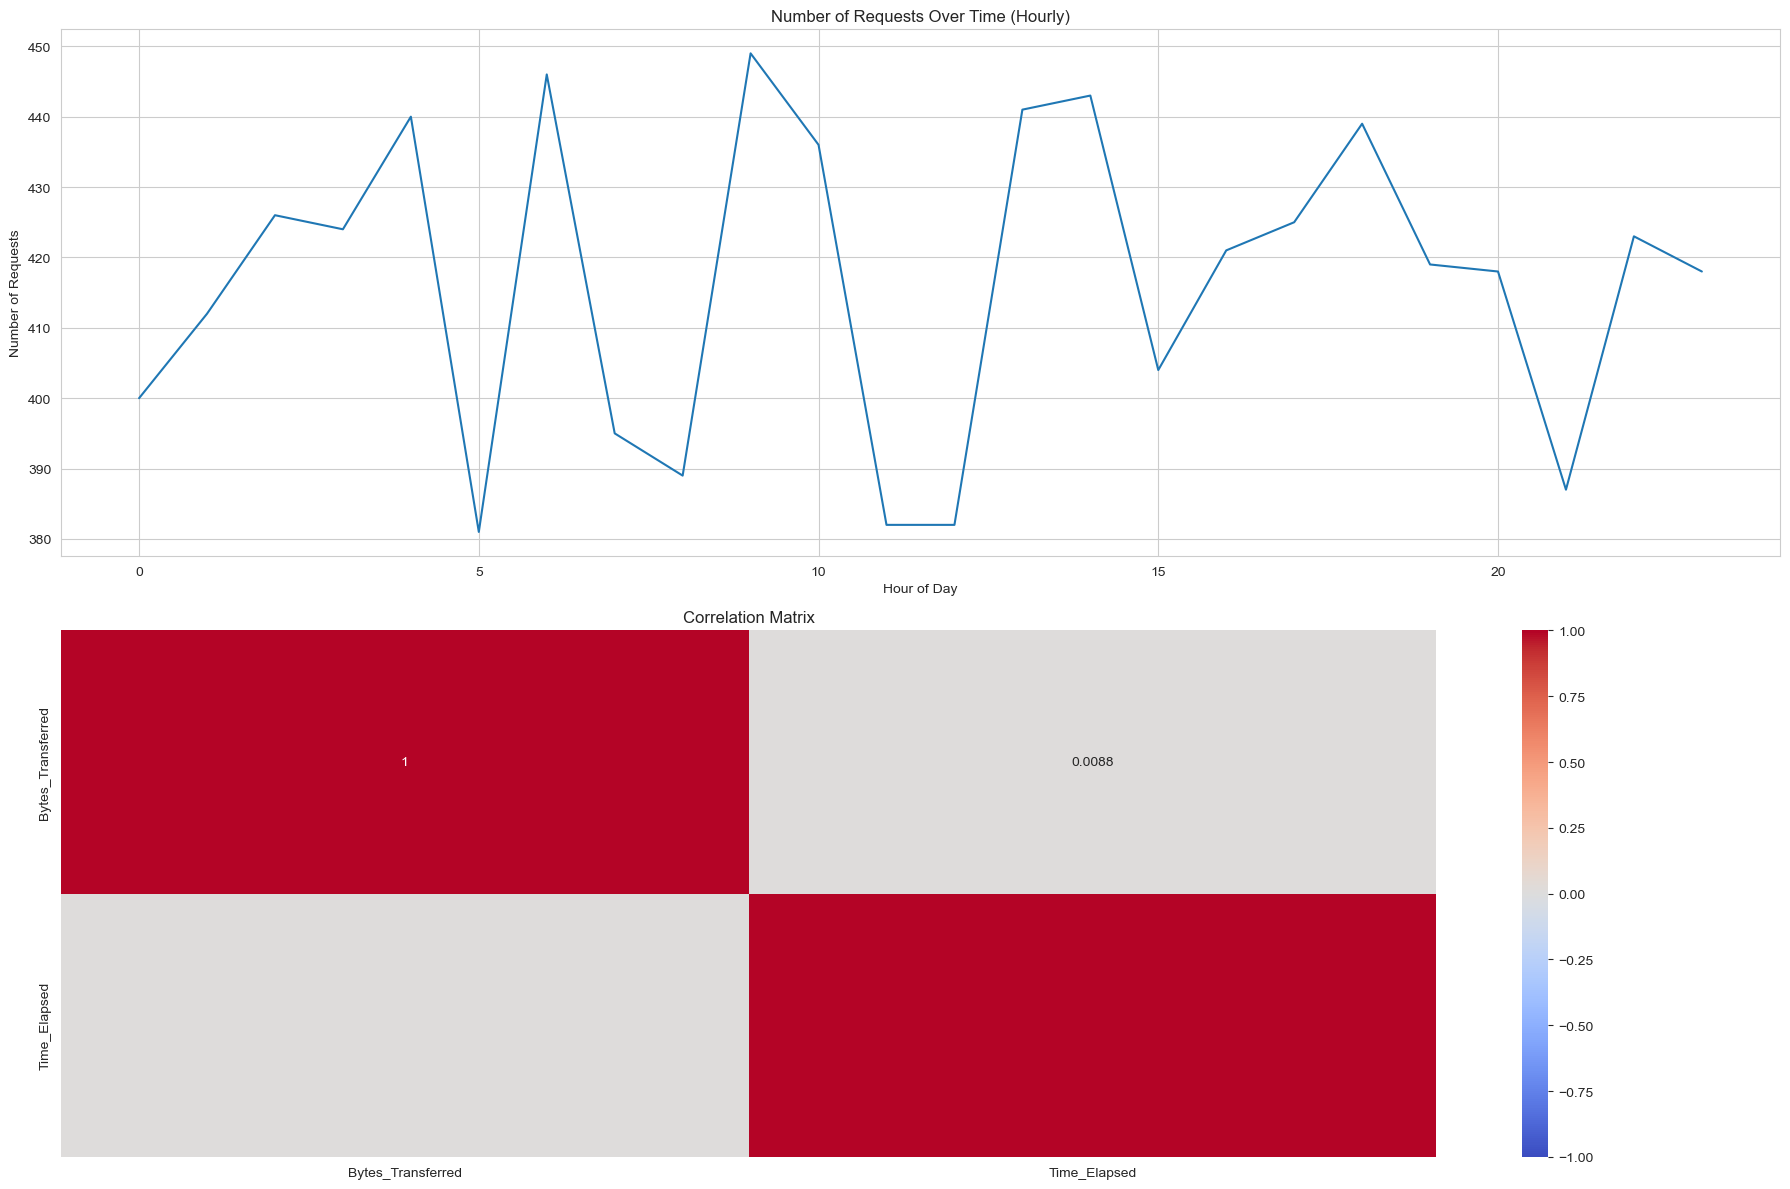

In [8]:
# Create a figure for hourly trends and correlation analysis
fig, axs = plt.subplots(2, 1, figsize=(18, 12))

# Hourly trends of requests
hourly_requests = funolympics['Hour'].value_counts().sort_index()
sns.lineplot(x=hourly_requests.index, y=hourly_requests.values, ax=axs[0])
axs[0].set_title('Number of Requests Over Time (Hourly)')
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('Number of Requests')

# Correlation analysis
corr = funolympics[['Bytes_Transferred', 'Time_Elapsed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1])
axs[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

#### Average bytes transferred per country and per sport

In [9]:
# Average bytes transferred per country
avg_bytes_country = funolympics.groupby('Country')['Bytes_Transferred'].mean().sort_values(ascending=False)

# Average bytes transferred per sport
avg_bytes_sport = funolympics.groupby('Sport')['Bytes_Transferred'].mean().sort_values(ascending=False)

avg_bytes_country.head(10), avg_bytes_sport.head(10)


(Country
 Tanzania          5976.917431
 Ghana             5647.481818
 Nigeria           5631.284211
 Eswatini          5554.312500
 France            5529.903226
 Kenya             5520.646465
 Palestine         5515.940000
 Senegal           5459.833333
 Czech Republic    5421.293478
 Slovakia          5380.585859
 Name: Bytes_Transferred, dtype: float64,
 Sport
 Archery                        5262.947368
 Cycling                        5236.207084
 Athletics (Track and Field)    5235.607843
 Fencing                        5227.099398
 Golf                           5205.554598
 Weightlifting                  5197.381679
 Rowing                         5191.217877
 Triathlon                      5157.577844
 Gymnastics                     5148.583333
 Badminton                      5146.834734
 Name: Bytes_Transferred, dtype: float64)